In [1]:
import pandas as pd
import numpy as np
import json


In [53]:
experiment = "experiment-traffic-lights"
with open(f'traffic/input_files/{experiment}/traffic.json', "r") as read_file:
    drivers_input_data = json.load(read_file)
with open(f'traffic/input_files/{experiment}/drivers.json', "r") as read_file:
    traffic_input_data = json.load(read_file)
with open(f'traffic/input_files/{experiment}/lights.json', "r") as read_file:
    lights_input_data = json.load(read_file)

In [64]:
experiment_results = pd.read_csv(f'traffic/output_files/{experiment}/measures_files.csv').drop(["Unnamed: 0"],axis=1)

experiment_results

,n_agents,max_speed_avg,max_speed_dev,desired_distance_avg,desired_distance_dev,acceleration_avg,acceleration_dev,n_lanes,t_start,t_end,x_start,x_end,measure_point_x,accepted_dist_delta,window_size,average_velocity,rolling_average_density,rolling_average_flow
0,75,0.75,0.4,30,0,1.5,0.3,3,490,3431,500,600,500,10,100,1.447810,0.056112,3.793103
1,75,1.00,0.4,30,0,1.5,0.3,3,5559,7281,500,600,500,10,100,1.461280,0.053768,5.470588
2,75,1.25,0.4,30,0,1.5,0.3,3,8536,10094,500,600,500,10,100,1.466489,0.046763,5.800000
3,75,1.75,0.4,30,0,1.5,0.3,3,10948,12509,500,600,500,10,100,1.462662,0.029712,5.600000
4,75,2.00,0.4,30,0,1.5,0.3,3,13153,14683,500,600,500,10,100,1.456144,0.025244,5.266667
5,75,2.25,0.4,30,0,1.5,0.3,3,15193,16763,500,600,500,10,100,1.447180,0.021651,5.200000


In [55]:
agent_data = pd.read_csv(f'traffic/output_files/{experiment}/agent_data.csv')
agent_data["Velocity"] = agent_data["Velocity"].apply(lambda x: float(x.split(" ")[0].replace("[","")))
agent_data["Velocity"] = agent_data["Velocity"].astype(float)
agent_data.head()

,Step,AgentID,X,Y,Velocity,Current_lane,Is_alive
0,1,0,0.965818,100.000000,0.965818,1,True
1,1,1,0.752685,166.666667,0.752685,2,True
2,1,2,0.584134,33.333333,0.584134,0,True
3,1,3,0.000000,33.333333,1.143391,0,False
4,1,4,0.000000,33.333333,1.032703,0,False


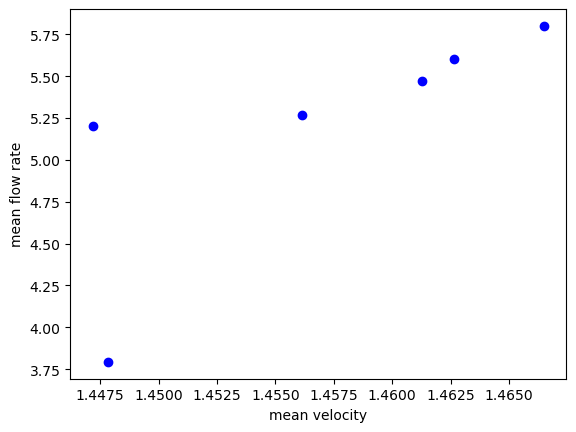

In [65]:
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax = plt.subplots()

ax.scatter(experiment_results['average_velocity'], 
           experiment_results['rolling_average_flow'], 
           color='blue')

# Add labels and legend
ax.set_xlabel('mean velocity')
ax.set_ylabel('mean flow rate')
# ax.legend()

# Display the plot
plt.show()

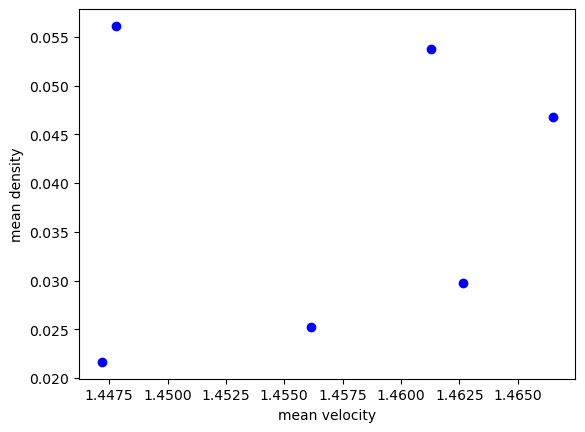

In [66]:
# Create a new figure and axis
fig, ax = plt.subplots()

ax.scatter(experiment_results['average_velocity'], 
           experiment_results['rolling_average_density'], 
           color='blue')

# Add labels and legend
ax.set_xlabel('mean velocity')
ax.set_ylabel('mean density')
# ax.legend()

# Display the plot
plt.show()

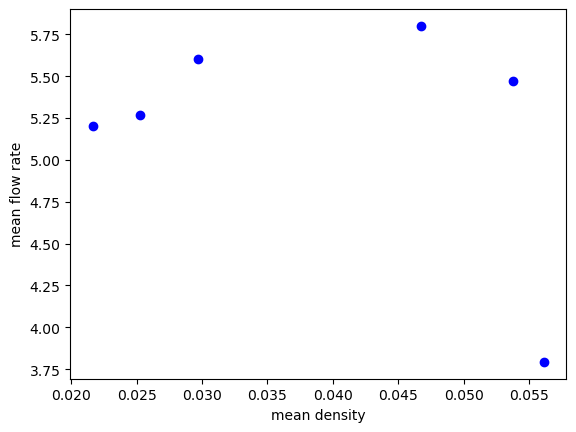

In [67]:
# Create a new figure and axis
fig, ax = plt.subplots()

ax.scatter(experiment_results['rolling_average_density'], 
           experiment_results['rolling_average_flow'], 
           color='blue')

# Add labels and legend
ax.set_xlabel('mean density')
ax.set_ylabel('mean flow rate')
# ax.legend()

# Display the plot
plt.show()

In [68]:
#saving experiment results to one big csv?

big_frame = pd.read_csv("collected_experiment_results.csv")
big_frame = big_frame.append(experiment_results, ignore_index = True)
big_frame.to_csv('collected_experiment_results.csv', index = False)

/var/folders/9g/cf5w7h4j47l9cy_lg6r_0nzc0000gr/T/ipykernel_13896/1679567755.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_frame = big_frame.append(experiment_results, ignore_index = True)


In [45]:

to_do.to_csv('collected_experiment_results.csv', index = False)